# Post analysis of electrification results

Processing OnSSET electrification results for post analysis and presentation

**Original code:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Conceptualization & Methodological review :**  [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Updates, Modifications:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Funding:** The World Bank

In [27]:
# Importing necessary modules

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
import os
import numpy as np
from earthpy import clip as cl
from shapely.geometry import Point, Polygon
import logging
%matplotlib inline

2020-07-29 11:40:33,467		Loaded backend module://ipykernel.pylab.backend_inline version unknown.


### Importing, projecting and Plotting basemap

In [2]:
path_shp = r"C:\Users\alexl\Dropbox\GitHub\gep-onsset-testing-ground\admin_eri"
name_shp = "gadm36_ERI_2.shp"
admin_gdf = gpd.read_file(path_shp + "\\" + name_shp)

In [3]:
# Reproject data to the proper coordinate system for the country
admin_gdf_prj = admin_gdf.to_crs({'init': 'epsg:32637'})

C:\Users\alexl\anaconda3\envs\gep_onsset_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


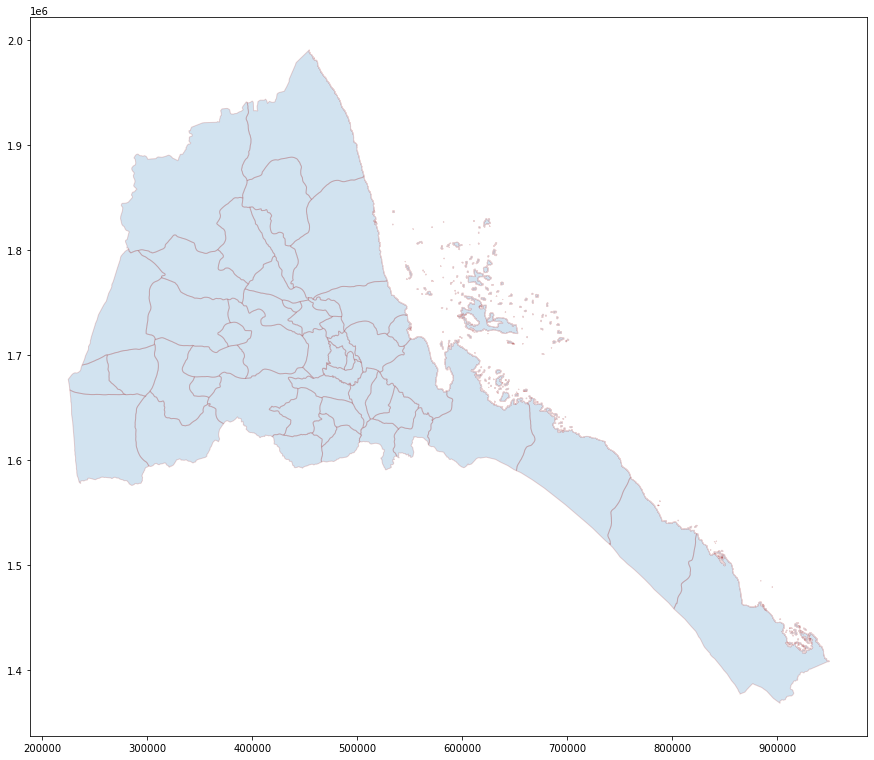

In [4]:
# Plot basemap
fig, ax = plt.subplots(figsize=(15, 15))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
ax.set_aspect('equal', 'box')

# Save plot as figure 
#plt.savefig('Country's basemap.png', bbox_inches='tight')

### Importing Electrification result - setting geodf, projecting and plotting

In [5]:
# Import data 
path = r"C:\Users\alexl\Dropbox\GitHub\gep-onsset-testing-ground\Sample_Results"
name_of_file = "Erithrea_5_0_full_costs_new_Results.csv"

In [6]:
# Import csv as pandas dataframe
result_gdf = pd.read_csv(path + "\\" + name_of_file)

In [7]:
result_gdf.head(4)

,Country,NightLights,Pop,id,GridCellArea,ElecPop,WindVel,GHI,TravelHours,Elevation,...,InvestmentCostTransformer2030,InvestmentCostConnection2030,CapitalCapacityInvestment2030,RecurringCosts2030,ElecStatusIn2030,InvestmentCapita2030,GridElecIn2030,OffGridElecIn2030,FinalElecCode2030,NewCapacity2030
0,Eritrea,0.0,67.438430,ER-31046.000,0.017,67.438430,7.220146,2208.0,4.066667,746.0,...,0.0,0.0,10729.803768,1071.415979,1,229.950182,0,1,3.0,3.809139
1,Eritrea,0.0,247.274245,ER-20099.000,0.060,247.274245,7.482106,2206.0,3.916667,745.0,...,0.0,0.0,812.991340,81.180601,1,495.330269,0,1,3.0,0.134108
2,Eritrea,0.0,112.397384,ER-31040.000,0.017,112.397384,8.014406,2206.0,3.916667,745.0,...,0.0,0.0,369.541518,36.900273,1,495.330269,0,1,3.0,0.060958
3,Eritrea,0.0,22.479477,ER-31047.000,0.009,22.479477,6.976023,2216.0,1.666667,520.0,...,0.0,0.0,73.574782,7.346751,1,493.095024,0,1,3.0,0.012137


In [8]:
# Creating a geo-dataframe - appointing geometry attribute
result_gdf['geometry'] = list(zip(result_gdf['X_deg'], result_gdf['Y_deg']))
result_gdf['geometry'] = result_gdf['geometry'].apply(Point)
result_gdf = gpd.GeoDataFrame(result_gdf, geometry='geometry', crs={'init': 'epsg:4326'})

C:\Users\alexl\anaconda3\envs\gep_onsset_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [9]:
result_gdf_prj = result_gdf.to_crs({'init': 'epsg:32637'})

In [10]:
result_gdf_prj.head(4)

,Country,NightLights,Pop,id,GridCellArea,ElecPop,WindVel,GHI,TravelHours,Elevation,...,InvestmentCostConnection2030,CapitalCapacityInvestment2030,RecurringCosts2030,ElecStatusIn2030,InvestmentCapita2030,GridElecIn2030,OffGridElecIn2030,FinalElecCode2030,NewCapacity2030,geometry
0,Eritrea,0.0,67.438430,ER-31046.000,0.017,67.438430,7.220146,2208.0,4.066667,746.0,...,0.0,10729.803768,1071.415979,1,229.950182,0,1,3.0,3.809139,POINT (866469.846 1388702.333)
1,Eritrea,0.0,247.274245,ER-20099.000,0.060,247.274245,7.482106,2206.0,3.916667,745.0,...,0.0,812.991340,81.180601,1,495.330269,0,1,3.0,0.134108,POINT (866124.924 1388829.828)
2,Eritrea,0.0,112.397384,ER-31040.000,0.017,112.397384,8.014406,2206.0,3.916667,745.0,...,0.0,369.541518,36.900273,1,495.330269,0,1,3.0,0.060958,POINT (865739.771 1389062.233)
3,Eritrea,0.0,22.479477,ER-31047.000,0.009,22.479477,6.976023,2216.0,1.666667,520.0,...,0.0,73.574782,7.346751,1,493.095024,0,1,3.0,0.012137,POINT (867651.379 1399056.128)


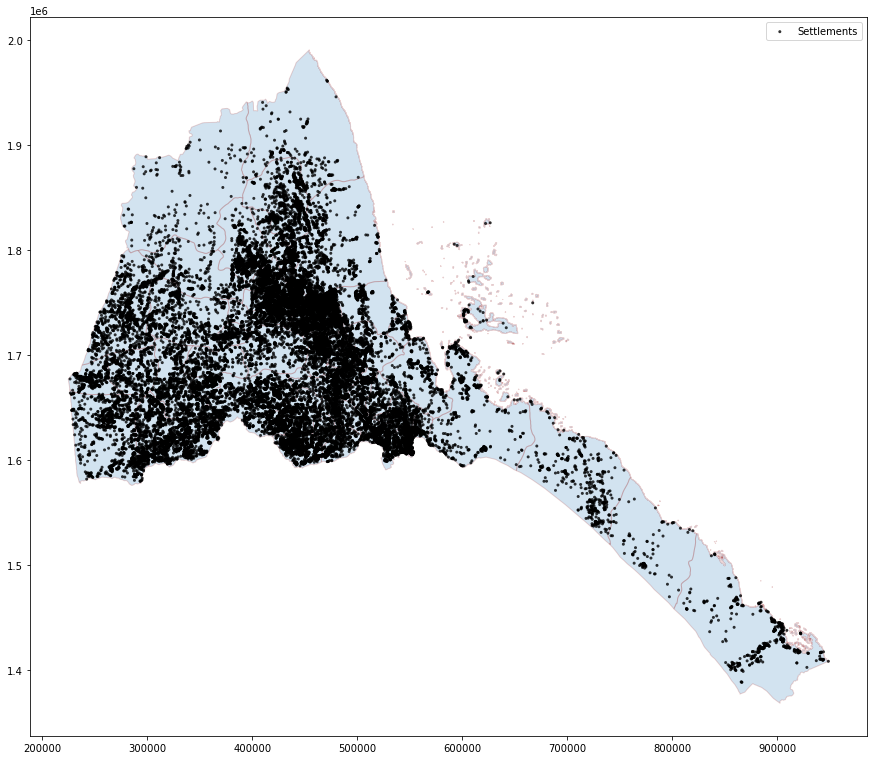

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
result_gdf_prj.plot(ax=ax, color='black', edgecolor='none', figsize=(20, 20), alpha=0.8, label='Settlements', marker='.')
ax.set_aspect('equal', 'box')
leg = ax.legend()
 
# Save plot as figure 
#plt.savefig('Settlements_in_the_Country.png', bbox_inches='tight')

## Insight 1
Insights regarding the lcoe difference between grid extension and off-grid technologies in the cases that the latter (mini-grid or stand-alone systems) have been deployed as least cost option in the electrification analysis.

In [15]:
# Importing the gep_onsset model which we will use to "backcast" the grid lcoe for those settlements. **Note** that this is solely a proxy
from gep_onsset import Technology
base_year = 2019
start_year = 2019
end_year = 2030
discount_rate = 0.08
Technology.set_default_values(base_year, start_year, end_year, discount_rate)

# Initiate the class with grid related parameters (you may copy this from gep_runner or GEP Generator)
grid_calc = Technology(om_of_td_lines=0.02,
                       distribution_losses=0.02,
                       connection_cost_per_hh=125,
                       base_to_peak_load_ratio=0.8,
                       capacity_factor=1,
                       tech_life=30,
                       grid_capacity_investment=1448,
                       grid_penalty_ratio=1,
                       grid_price=0.057)

In [17]:
# Create a new dataframe consisting of the settlements where off-grid techs have been deployed in the selected year

#2025
off_grid_over_grid_df_2025 = result_gdf_prj[(result_gdf["FinalElecCode2025"] != 99) &
                                            (result_gdf["FinalElecCode2025"] != 1)]

off_grid_over_grid_df_2025["Est_gridlcoe"] = off_grid_over_grid_df_2025.apply(lambda row: grid_calc.get_lcoe
                                                                (energy_per_cell=row["EnergyPerSettlement2025"],
                                                                 start_year=start_year,
                                                                 end_year=end_year,
                                                                 people=row["Pop2025"],
                                                                 new_connections=row["NewConnections2025"],
                                                                 total_energy_per_cell=row["TotalEnergyPerCell"],
                                                                 prev_code=row["FinalElecCode2019"],
                                                                 num_people_per_hh=row["NumPeoplePerHH"],
                                                                 grid_cell_area=row["GridCellArea"],
                                                                 additional_mv_line_length=row["minTDdist"],
                                                                 elec_loop=row["ElectrificationOrder2025"]), axis=1)




C:\Users\alexl\anaconda3\envs\gep_onsset_env\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [18]:
off_grid_over_grid_df_2025["lcoe_dif"] = off_grid_over_grid_df_2025["Est_gridlcoe"] - off_grid_over_grid_df_2025["MinimumOverallLCOE2025"]

In [19]:
perc =[.10, .20, .30, .40, .50, .60, .70, .80, .90] 
off_grid_over_grid_df_2025["lcoe_dif"].describe(percentiles=perc)

count    13355.000000
mean        35.357035
std        129.722177
min         -0.236406
10%          0.288957
20%          0.969990
30%          1.850192
40%          2.885650
50%          4.208774
60%          5.854618
70%          8.891338
80%         14.727441
90%         38.621547
max       1050.626275
Name: lcoe_dif, dtype: float64

In [31]:
off_grid_over_grid_df_2025_plot = off_grid_over_grid_df_2025[(off_grid_over_grid_df_2025["lcoe_dif"] > 0) &
                                                            (off_grid_over_grid_df_2025["lcoe_dif"] < 0.25)]
print ("There are {} areas where the difference is less than 0.25 $/kWh".format(len(off_grid_over_grid_df_2025_plot)))

There are 612 areas where the difference is less than 0.25 $/kWh


2020-07-29 11:46:38,415		locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001B75609A310>
2020-07-29 11:46:38,416		Using auto colorbar locator on colorbar
2020-07-29 11:46:38,416		locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001B75609A310>
2020-07-29 11:46:38,417		Setting pcolormesh


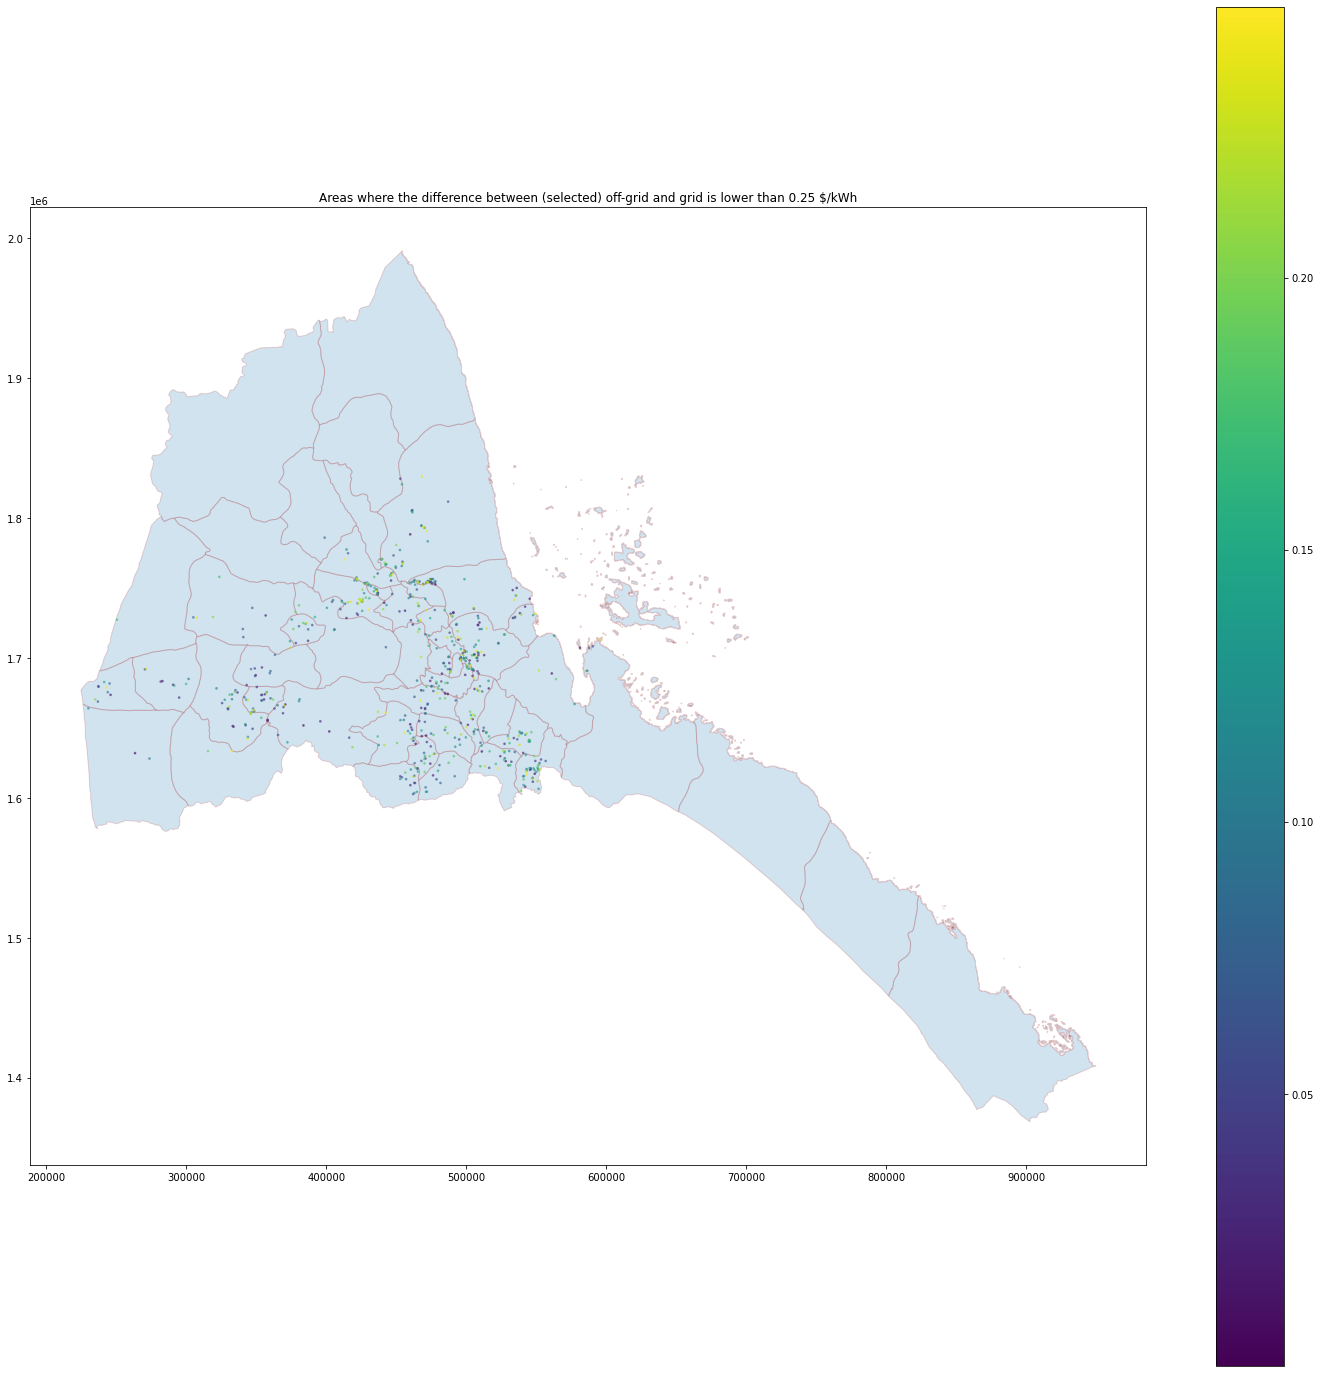

In [32]:
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 25))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
off_grid_over_grid_df_2025_plot.sort_values('lcoe_dif', ascending=True).plot(ax=ax, column='lcoe_dif', 
                                                                 legend=True, markersize=3, cmap="viridis",
                                                                 figsize=(20, 20), alpha=0.5)
# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Areas where the difference between (selected) off-grid and grid is lower than 0.25 $/kWh'.format(""))

# Save plot as figure 
#plt.savefig('Example.png', bbox_inches='tight')
logging.getLogger('matplotlib.font_manager').disabled = True

In [33]:
#2030
off_grid_over_grid_df_2030 = result_gdf_prj[(result_gdf["FinalElecCode2030"] != 1)]
off_grid_over_grid_df_2030["Est_gridlcoe"] = off_grid_over_grid_df_2030.apply(lambda row: grid_calc.get_lcoe
                                                                (energy_per_cell=row["EnergyPerSettlement2030"],
                                                                 start_year=2025,
                                                                 end_year=end_year,
                                                                 people=row["Pop2030"],
                                                                 new_connections=row["NewConnections2030"],
                                                                 total_energy_per_cell=row["TotalEnergyPerCell"],
                                                                 prev_code=row["FinalElecCode2025"],
                                                                 num_people_per_hh=row["NumPeoplePerHH"],
                                                                 grid_cell_area=row["GridCellArea"],
                                                                 additional_mv_line_length=row["minTDdist"],
                                                                 elec_loop=row["ElectrificationOrder2030"]), axis=1)

C:\Users\alexl\anaconda3\envs\gep_onsset_env\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [34]:
off_grid_over_grid_df_2030["lcoe_dif"] = off_grid_over_grid_df_2030["Est_gridlcoe"] - off_grid_over_grid_df_2030["MinimumOverallLCOE2030"]

In [35]:
off_grid_over_grid_df_2030["lcoe_dif"].describe(percentiles=perc)

count     22798.000000
mean       2087.207217
std       10143.034054
min          -0.379791
10%           3.923617
20%           8.598447
30%          16.456501
40%          34.555168
50%         112.079261
60%         233.953371
70%         378.868641
80%         671.704992
90%        1719.930023
max      105720.204743
Name: lcoe_dif, dtype: float64

In [37]:
off_grid_over_grid_df_2030_plot = off_grid_over_grid_df_2030[(off_grid_over_grid_df_2030["lcoe_dif"] > 0) &
                                                            (off_grid_over_grid_df_2030["lcoe_dif"] < 0.1)]
print ("There are {} areas where the difference is less than 0.1 $/kWh".format(len(off_grid_over_grid_df_2030_plot)))

There are 34 areas where the difference is less than 0.1 $/kWh


2020-07-29 11:48:07,891		locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001B75FB32970>
2020-07-29 11:48:07,891		Using auto colorbar locator on colorbar
2020-07-29 11:48:07,892		locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001B75FB32970>
2020-07-29 11:48:07,892		Setting pcolormesh


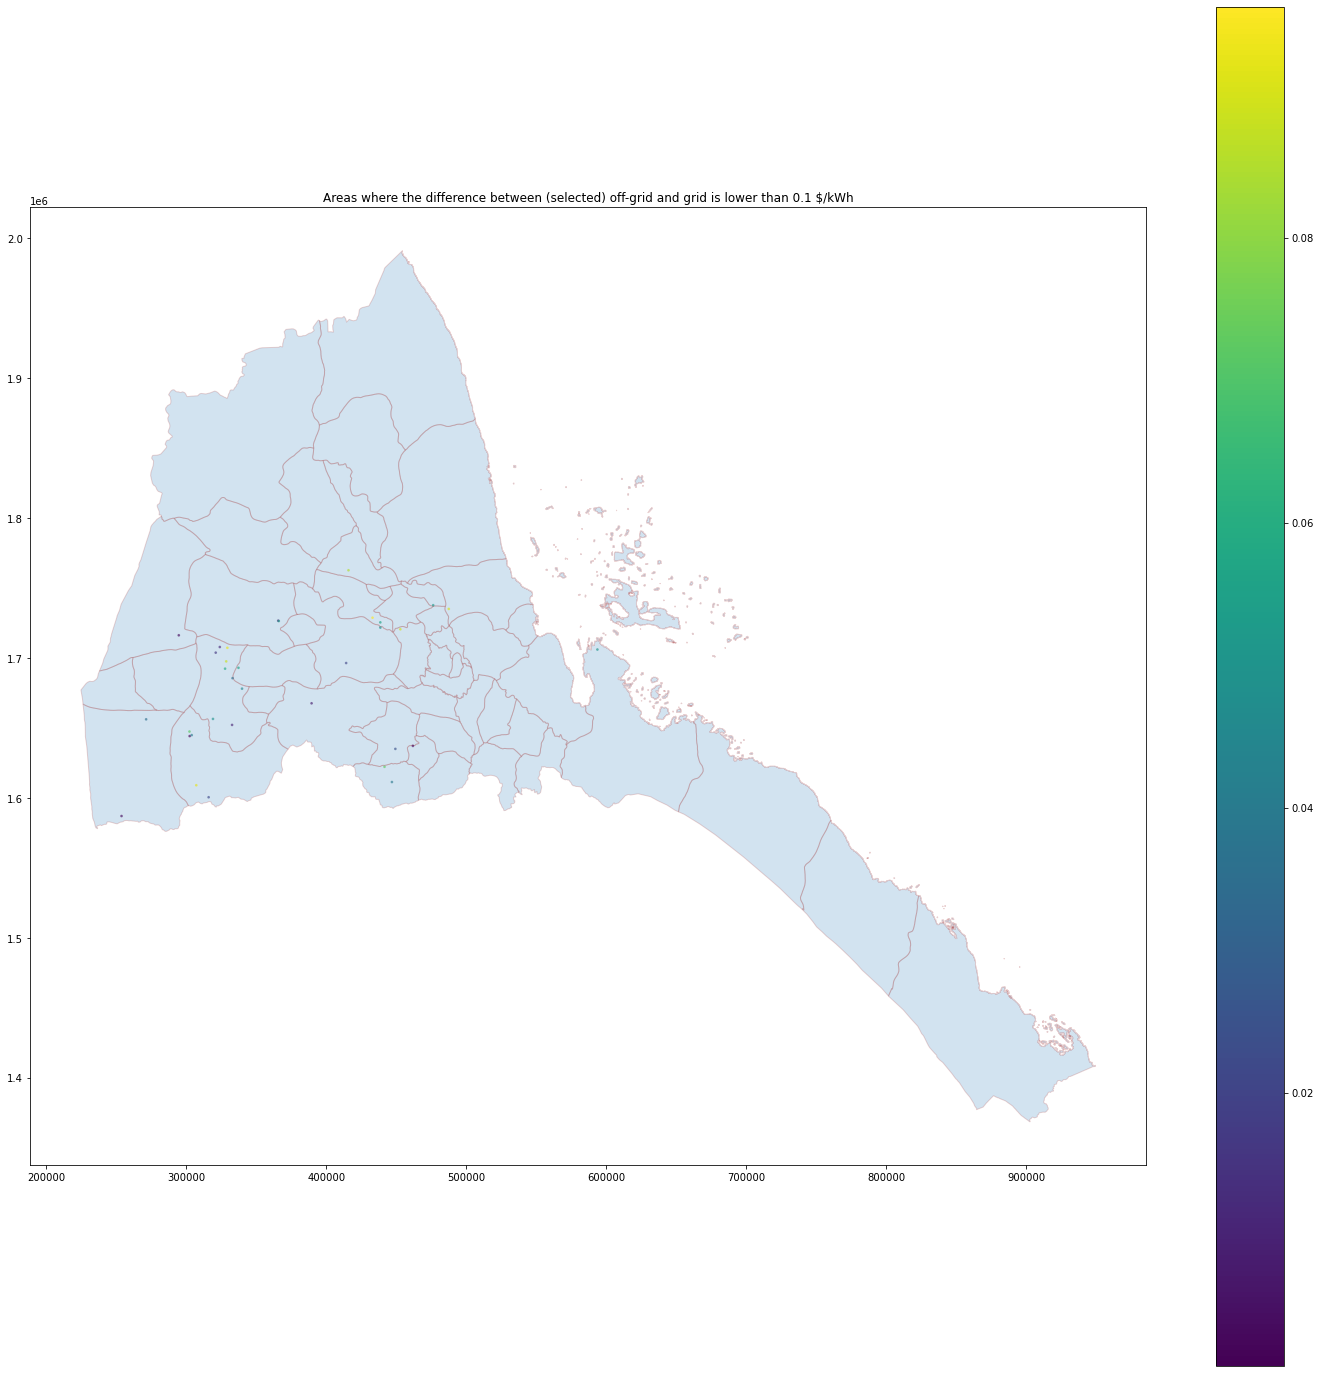

In [38]:
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 25))
admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
off_grid_over_grid_df_2030_plot.sort_values('lcoe_dif', ascending=True).plot(ax=ax, column='lcoe_dif', 
                                                                 legend=True, markersize=3, cmap="viridis",
                                                                 figsize=(20, 20), alpha=0.5)
# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Areas where the difference between (selected) off-grid and grid is lower than 0.1 $/kWh'.format(""))

# Save plot as figure 
#plt.savefig('Example.png', bbox_inches='tight')
logging.getLogger('matplotlib.font_manager').disabled = True

## Insight 2

Median value of connection cost (per household) for Grid, Mini-grids and Solar Home Systems (stand alone) in 2025 and 2030 

In [50]:
# Create a column of investment cost per hh connection
result_gdf["InvestmentHH2025"] = result_gdf["InvestmentCapita2025"] * result_gdf["NumPeoplePerHH"]
result_gdf["InvestmentHH2030"] = result_gdf["InvestmentCapita2030"] * result_gdf["NumPeoplePerHH"]

In [59]:
#2025
# Grid
CostPerConnection_Grid_2025 = result_gdf[(result_gdf["FinalElecCode2025"] == 1)]["InvestmentHH2025"].median()
# Stand alone diesel
CostPerConnection_SADiesel_2025 = result_gdf[(result_gdf["FinalElecCode2025"] == 2)]["InvestmentHH2025"].median()
# Stand alone PV
CostPerConnection_SAPV_2025 = result_gdf[(result_gdf["FinalElecCode2025"] == 3)]["InvestmentHH2025"].median()
# Mini grid diesel
CostPerConnection_MGDiesel_2025 = result_gdf[(result_gdf["FinalElecCode2025"] == 4)]["InvestmentHH2025"].median()
# Mini grid PV
CostPerConnection_MGPV_2025 = result_gdf[(result_gdf["FinalElecCode2025"] == 5)]["InvestmentHH2025"].median()
# Mini grid Wind
CostPerConnection_MGWind_2025 = result_gdf[(result_gdf["FinalElecCode2025"] == 6)]["InvestmentHH2025"].median()
# Mini grid Hydro
CostPerConnection_MGHydro_2025 = result_gdf[(result_gdf["FinalElecCode2025"] == 7)]["InvestmentHH2025"].median()
# Mini grids 
CostPerConnection_MG_2025 = result_gdf[(result_gdf["FinalElecCode2025"] == 4) |
                                      (result_gdf["FinalElecCode2025"] == 5) |
                                      (result_gdf["FinalElecCode2025"] == 6) |
                                      (result_gdf["FinalElecCode2025"] == 7)]["InvestmentHH2025"].median()
# Stand alone systems
CostPerConnection_SA_2025 = result_gdf[(result_gdf["FinalElecCode2025"] == 2) |
                                      (result_gdf["FinalElecCode2025"] == 3)]["InvestmentHH2025"].median()

#2030
# Grid
CostPerConnection_Grid_2030 = result_gdf[(result_gdf["FinalElecCode2030"] == 1)]["InvestmentHH2030"].median()
# Stand alone diesel
CostPerConnection_SADiesel_2030 = result_gdf[(result_gdf["FinalElecCode2030"] == 2)]["InvestmentHH2030"].median()
# Stand alone PV
CostPerConnection_SAPV_2030 = result_gdf[(result_gdf["FinalElecCode2030"] == 3)]["InvestmentHH2030"].median()
# Mini grid diesel
CostPerConnection_MGDiesel_2030 = result_gdf[(result_gdf["FinalElecCode2030"] == 4)]["InvestmentHH2030"].median()
# Mini grid PV
CostPerConnection_MGPV_2030 = result_gdf[(result_gdf["FinalElecCode2030"] == 5)]["InvestmentHH2030"].median()
# Mini grid Wind
CostPerConnection_MGWind_2030 = result_gdf[(result_gdf["FinalElecCode2030"] == 6)]["InvestmentHH2030"].median()
# Mini grid Hydro
CostPerConnection_MGHydro_2030 = result_gdf[(result_gdf["FinalElecCode2030"] == 7)]["InvestmentHH2030"].median()
# Mini grids 
CostPerConnection_MG_2030 = result_gdf[(result_gdf["FinalElecCode2030"] == 4) |
                                      (result_gdf["FinalElecCode2030"] == 5) |
                                      (result_gdf["FinalElecCode2030"] == 6) |
                                      (result_gdf["FinalElecCode2030"] == 7)]["InvestmentHH2030"].median()
# Stand alone systems
CostPerConnection_SA_2030 = result_gdf[(result_gdf["FinalElecCode2030"] == 2) |
                                      (result_gdf["FinalElecCode2030"] == 3)]["InvestmentHH2030"].median()


In [194]:
print ("The median household connection cost (in $) per technology in 2025 is \n\n Grid:{:.1f} \n Mini-grid combined: {:.1f} \n Mini-grid Diesel: {:.1f} \n Mini-grid PV: {:.1f}\n Mini-grid Wind: {:.1f} \n Mini-grid Hydro: {:.1f} \n Stand alone combined: {:.1f} \n Stand alone Diesel: {:.1f} \n Stand alone PV: {:.1f}".
       format(CostPerConnection_Grid_2025,
              CostPerConnection_MG_2025,
              CostPerConnection_MGDiesel_2025, 
              CostPerConnection_MGPV_2025, 
              CostPerConnection_MGWind_2025,
              CostPerConnection_MGHydro_2025,
              CostPerConnection_SA_2025,
              CostPerConnection_SADiesel_2025,
              CostPerConnection_SAPV_2025))

print ("\n ...and for 2030 is \n\n Grid:{:.1f} \n Mini-grid combined: {:.1f} \n Mini-grid Diesel: {:.1f} \n Mini-grid PV: {:.1f}\n Mini-grid Wind: {:.1f} \n Mini-grid Hydro: {:.1f} \n Stand alone combined: {:.1f} \n Stand alone Diesel: {:.1f} \n Stand alone PV: {:.1f}".
       format(CostPerConnection_Grid_2030,
              CostPerConnection_MG_2030,
              CostPerConnection_MGDiesel_2030, 
              CostPerConnection_MGPV_2030, 
              CostPerConnection_MGWind_2030,
              CostPerConnection_MGHydro_2030,
              CostPerConnection_SA_2030,
              CostPerConnection_SADiesel_2030,
              CostPerConnection_SAPV_2030))

The median household connection cost (in $) per technology in 2025 is 

 Grid:742.9 
 Mini-grid combined: 2403.6 
 Mini-grid Diesel: nan 
 Mini-grid PV: nan
 Mini-grid Wind: nan 
 Mini-grid Hydro: 2403.6 
 Stand alone combined: 1903.8 
 Stand alone Diesel: nan 
 Stand alone PV: 1903.8

 ...and for 2030 is 

 Grid:3238.9 
 Mini-grid combined: 1510.2 
 Mini-grid Diesel: nan 
 Mini-grid PV: 4626.1
 Mini-grid Wind: nan 
 Mini-grid Hydro: 1445.2 
 Stand alone combined: 2540.1 
 Stand alone Diesel: nan 
 Stand alone PV: 2540.1


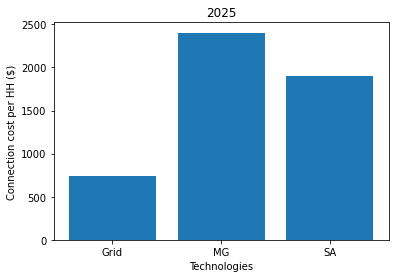

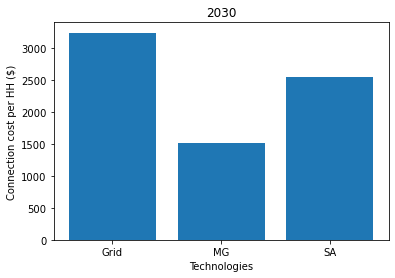

In [206]:
# Plotting:
#2025
height2025 = [CostPerConnection_Grid_2025,CostPerConnection_MG_2025,CostPerConnection_SA_2025]
bars = ('Grid', 'MG','SA')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height2025)
plt.xticks(y_pos, bars)
plt.title('2025')
plt.xlabel('Technologies')
plt.ylabel('Connection cost per HH ($)')
plt.show()

#2030
height2030 = [CostPerConnection_Grid_2030,CostPerConnection_MG_2030,CostPerConnection_SA_2030]
y_pos = np.arange(len(bars))
plt.bar(y_pos, height2030)
plt.xticks(y_pos, bars)
plt.title('2030')
plt.xlabel('Technologies')
plt.ylabel('Connection cost per HH ($)')

plt.show()

In [218]:
## Visualization all in one figure sample
#fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
#
#plt.subplot(121)
#height2025 = [CostPerConnection_Grid_2025,CostPerConnection_MG_2025,CostPerConnection_SA_2025]
#bars = ('Grid', 'MG','SA')
#y_pos = np.arange(len(bars))
#plt.bar(y_pos, height2025)
#plt.xticks(y_pos, bars)
#plt.title('2025')
#plt.xlabel('Technologies')
#plt.ylabel('Connection cost per HH ($)')
#
#plt.subplot(122)
#height2025 = [CostPerConnection_Grid_2025,CostPerConnection_MG_2025,CostPerConnection_SA_2025]
#bars = ('Grid', 'MG','SA')
#y_pos = np.arange(len(bars))
#plt.bar(y_pos, height2030)
#plt.xticks(y_pos, bars)
#plt.title('2030')
#plt.xlabel('Technologies')
##plt.ylabel('Connection cost per HH ($)')
#
#plt.tight_layout(pad=3.0)
#plt.show()

## Insight 3
Get results per administrative units

In [151]:
# Perform spatial join
states_per_location = gpd.sjoin(result_gdf_prj, admin_gdf_prj, how="left", op='within')

In [152]:
# Drop not needed columns
droping_cols = ['GID_0', 'NAME_0', 'GID_1', 'NL_NAME_1', 'GID_2',
                'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2']

states_per_location.drop(droping_cols, axis=1, inplace=True)

In [153]:
## Cleaning names of admin attributes / remove blank spaces in state names    
#states_per_location["NAME_1"].replace('\s+', '_',regex=True,inplace=True)
#states_per_location["NAME_1"].replace("'", '_',regex=True,inplace=True)
#states_per_location["NAME_2"].replace('\s+', '_',regex=True,inplace=True)
#states_per_location["NAME_2"].replace("'", '_',regex=True,inplace=True)

# Change name of columns
states_per_location.rename(columns={'NAME_1': 'admin_1',
                                    'NAME_2': 'admin_2'}, inplace=True)

In [154]:
# Investment per state ($)
investment_per_state2025 = states_per_location.groupby(['admin_2'])['InvestmentCost2025'].sum()

##### Calculating results per province

In [155]:
admin_gdf_prj.rename(columns={'NAME_2': 'admin_2'}, inplace=True)
admin_gdf_prj['admin_2'].unique()

array(['Asmara City', 'Berikh', 'Ghala Nefhi', 'Serejeka', 'Afabet',
       'Foro', "Ghelaelo'", 'Ghida`e', 'Karora', 'Mitswa`e City', 'Nakfa',
       'Sheib', "Areta'", 'Central So. Red-Sea', 'Dahlak',
       'So. Southern Red-Sea', 'Akordat', 'Barentu', 'Dghe', 'Forto',
       'Gogne', 'Haykota', 'La`Elay Gash', 'Logo Anseba', 'Mansura',
       'Mogolo', 'Omhajer', 'Shemboko', 'Teseneye', 'Adi Keyih',
       'Adi Kwala', 'Areza', 'Dekemehare', 'Dibarwa', 'Kudo Bu`er',
       'May Mine', 'Mendefera', 'Segeneyiti', 'Senafe', 'Tsorena',
       'Adi Teklezan', 'Asmat', 'Elabered', 'Gheleb', 'Habero', 'Hagaz',
       'Halhal', 'Keren', 'Kerke Bet', 'Sel`a'], dtype=object)

In [156]:
# Merge investment
investment_per_state2025_map = pd.merge(admin_gdf_prj, investment_per_state2025, how='left', on=['admin_2'])
investment_per_state2025_map.InvestmentCost2025.fillna(0, inplace=True)

2020-07-29 15:11:53,606		locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001B75DC08A90>
2020-07-29 15:11:53,607		Using auto colorbar locator on colorbar
2020-07-29 15:11:53,607		locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001B75DC08A90>
2020-07-29 15:11:53,608		Setting pcolormesh


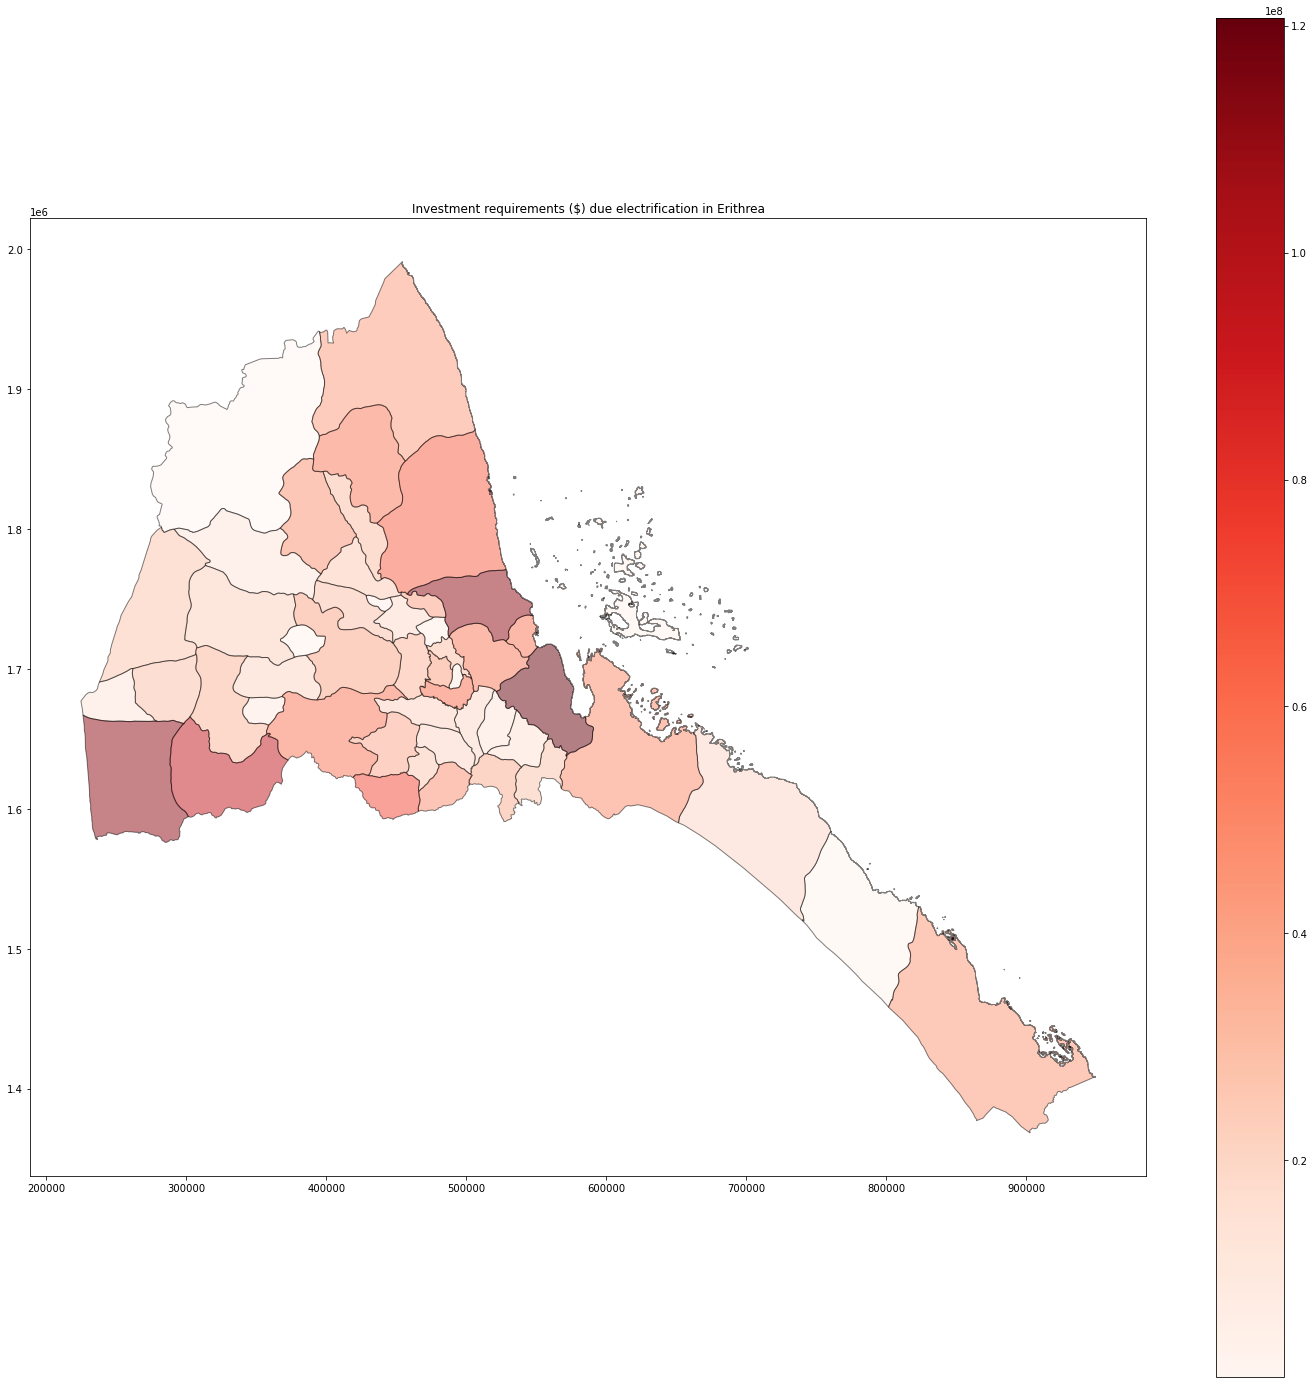

In [159]:
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 25))
#admin_gdf_prj.plot(ax=ax, edgecolor='brown', alpha=0.2)
investment_per_state2025_map.sort_values('InvestmentCost2025', ascending=True).plot(ax=ax, column='InvestmentCost2025', legend=True, cmap="Reds", edgecolor='black', figsize=(20, 20), alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Investment requirements ($) due electrification in Erithrea'.format(""))

# Save plot as figure 
#plt.savefig('Example.png', bbox_inches='tight')

##### Exporting results as table

In [162]:
# List of states from dataframe
list_of_states = investment_per_state2025_map.admin_2.unique()

# Create a dict using state name as keys
state_results = { i : len(list_of_states) for i in list_of_states }

# Assigning total investment requirements
for key , value in state_results.items():
    state_results[key] = (investment_per_state2025_map[(investment_per_state2025_map .admin_2 == key)]["InvestmentCost2025"].sum())

In [166]:
admin_2_results_df = pd.DataFrame(state_results.values(), index=state_results.keys(), columns=['Investment2025'])

In [168]:
admin_2_results_df.Investment2025.sum()

1818536710.7647467

##### Exporting result to csv

In [171]:
out_path = r"C:\Users\alexl\Dropbox\GitHub\gep-onsset-testing-ground"
name = "Sample_state_results"
admin_2_results_df.to_csv(os.path.join(out_path,"{c}.csv".format(c=name)))

## Insight 4
More detailed results

In [176]:
elements = []
yearsofanalysis = [2025, 2030]
cost_choice = 1

for year in (yearsofanalysis):
    elements.append("Population{}".format(year))
    elements.append("NewConnections{}".format(year))
    elements.append("Capacity{}".format(year))
    elements.append("Investment{}".format(year))

techs = ["Grid", "SA_Diesel", "SA_PV", "MG_Diesel", "MG_PV", "MG_Wind", "MG_Hydro"]

sumtechs = []
for year in yearsofanalysis:
    sumtechs.extend(["Population{}".format(year) + t for t in techs])
    sumtechs.extend(["NewConnections{}".format(year) + t for t in techs])
    sumtechs.extend(["Capacity{}".format(year) + t for t in techs])
    sumtechs.extend(["Investment{}".format(year) + t for t in techs])
    
if cost_choice == 1:
    for year in yearsofanalysis:
        sumtechs.extend(["InvestmentCostLV{}".format(year) + t for t in techs])
        sumtechs.extend(["InvestmentCostMV{}".format(year) + t for t in techs])
        sumtechs.extend(["InvestmentCostHV{}".format(year) + t for t in techs])
        sumtechs.extend(["InvestmentCostTransformer{}".format(year) + t for t in techs])
        sumtechs.extend(["InvestmentCostConnection{}".format(year) + t for t in techs])
        sumtechs.extend(["CapitalCapacityInvestment{}".format(year) + t for t in techs])
        sumtechs.extend(["RecurringCosts{}".format(year) + t for t in techs])
    else:
        pass

summary = pd.Series(index=sumtechs, name='country')

if cost_choice == 1:
    for year in yearsofanalysis:
        for t in techs:
            summary.loc["Population{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), 'Pop' + '{}'.format(year)].sum()
            summary.loc["NewConnections{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), 'NewConnections' + '{}'.format(year)].sum()
            summary.loc["Capacity{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), 'NewCapacity' + '{}'.format(year)].sum()/1000
            summary.loc["Investment{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), 'InvestmentCost' + '{}'.format(year)].sum()
            summary.loc["InvestmentCostLV{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), "InvestmentCostLV" + '{}'.format(year)].sum()
            summary.loc["InvestmentCostMV{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), "InvestmentCostMV" + '{}'.format(year)].sum()
            summary.loc["InvestmentCostHV{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), "InvestmentCostHV" + '{}'.format(year)].sum()
            summary.loc["InvestmentCostTransformer{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), "InvestmentCostTransformer" + '{}'.format(year)].sum()
            summary.loc["InvestmentCostConnection{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), "InvestmentCostConnection" + '{}'.format(year)].sum()
            summary.loc["CapitalCapacityInvestment{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), "CapitalCapacityInvestment" + '{}'.format(year)].sum()
            summary.loc["RecurringCosts{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), "RecurringCosts" + '{}'.format(year)].sum()
else:
    for year in yearsofanalysis:
        for t in techs:
            summary.loc["Population{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), 'Pop' + '{}'.format(year)].sum()
            summary.loc["NewConnections{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), 'NewConnections' + '{}'.format(year)].sum()
            summary.loc["Capacity{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), 'NewCapacity' + '{}'.format(year)].sum()/1000
            summary.loc["Investment{}".format(year) + t] = result_gdf_prj.loc[(result_gdf_prj['MinimumOverall' + '{}'.format(year)] == t + '{}'.format(year)) & (result_gdf_prj["FinalElecCode" + '{}'.format(year)] < 99), 'InvestmentCost' + '{}'.format(year)].sum()
    
summary = summary.fillna(0)
     
index = techs + ['Total']
columns = []

if cost_choice == 1:
    for year in yearsofanalysis:
        columns.append("Population{}".format(year))
        columns.append("NewConnections{}".format(year))
        columns.append("Capacity{} (MW)".format(year))
        columns.append("Investment{} (million USD)".format(year))
        columns.append("InvestmentLV{} (million USD)".format(year))
        columns.append("InvestmentMV{} (million USD)".format(year))
        columns.append("InvestmentHV{} (million USD)".format(year))
        columns.append("InvestmentTrans{} (million USD)".format(year))
        columns.append("InvestmentCon{} (million USD)".format(year))
        columns.append("InvestmentCap{} (million USD)".format(year))
        columns.append("RecurringCosts{} (million USD)".format(year))
else:
    for year in yearsofanalysis:
        columns.append("Population{}".format(year))
        columns.append("NewConnections{}".format(year))
        columns.append("Capacity{} (MW)".format(year))
        columns.append("Investment{} (million USD)".format(year))
    
summary_table = pd.DataFrame(index=index, columns=columns)

if cost_choice == 1:
    summary_table[columns[0]] = summary.iloc[0:7].astype(int).tolist() + [int(summary.iloc[0:7].sum())]
    summary_table[columns[1]] = summary.iloc[7:14].astype(int).tolist() + [int(summary.iloc[7:14].sum())]
    summary_table[columns[2]] = summary.iloc[14:21].astype(int).tolist() + [int(summary.iloc[14:21].sum())]
    summary_table[columns[3]] = [round(x/1e4)/1e2 for x in summary.iloc[21:28].astype(float).tolist()] + [round(summary.iloc[21:28].sum()/1e4)/1e2]
    summary_table[columns[4]] = [round(x/1e4)/1e2 for x in summary.iloc[56:63].astype(float).tolist()] + [round(summary.iloc[56:63].sum()/1e4)/1e2]
    summary_table[columns[5]] = [round(x/1e4)/1e2 for x in summary.iloc[63:70].astype(float).tolist()] + [round(summary.iloc[63:70].sum()/1e4)/1e2]
    summary_table[columns[6]] = [round(x/1e4)/1e2 for x in summary.iloc[70:77].astype(float).tolist()] + [round(summary.iloc[70:77].sum()/1e4)/1e2]
    summary_table[columns[7]] = [round(x/1e4)/1e2 for x in summary.iloc[77:84].astype(float).tolist()] + [round(summary.iloc[77:84].sum()/1e4)/1e2]
    summary_table[columns[8]] = [round(x/1e4)/1e2 for x in summary.iloc[84:91].astype(float).tolist()] + [round(summary.iloc[84:91].sum()/1e4)/1e2]
    summary_table[columns[9]] = [round(x/1e4)/1e2 for x in summary.iloc[91:98].astype(float).tolist()] + [round(summary.iloc[91:98].sum()/1e4)/1e2]
    summary_table[columns[10]] = [round(x/1e4)/1e2 for x in summary.iloc[98:105].astype(float).tolist()] + [round(summary.iloc[98:105].sum()/1e4)/1e2]
    
    summary_table[columns[11]] = summary.iloc[28:35].astype(int).tolist() + [int(summary.iloc[28:35].sum())]
    summary_table[columns[12]] = summary.iloc[35:42].astype(int).tolist() + [int(summary.iloc[35:42].sum())]
    summary_table[columns[13]] = summary.iloc[42:49].astype(int).tolist() + [int(summary.iloc[42:49].sum())]
    summary_table[columns[14]] = [round(x/1e4)/1e2 for x in summary.iloc[49:56].astype(float).tolist()] + [round(summary.iloc[49:56].sum()/1e4)/1e2]
    summary_table[columns[15]] = [round(x/1e4)/1e2 for x in summary.iloc[105:112].astype(float).tolist()] + [round(summary.iloc[105:112].sum()/1e4)/1e2]
    summary_table[columns[16]] = [round(x/1e4)/1e2 for x in summary.iloc[112:119].astype(float).tolist()] + [round(summary.iloc[112:119].sum()/1e4)/1e2]
    summary_table[columns[17]] = [round(x/1e4)/1e2 for x in summary.iloc[119:126].astype(float).tolist()] + [round(summary.iloc[119:126].sum()/1e4)/1e2]
    summary_table[columns[18]] = [round(x/1e4)/1e2 for x in summary.iloc[126:133].astype(float).tolist()] + [round(summary.iloc[126:133].sum()/1e4)/1e2]
    summary_table[columns[19]] = [round(x/1e4)/1e2 for x in summary.iloc[133:140].astype(float).tolist()] + [round(summary.iloc[133:140].sum()/1e4)/1e2]
    summary_table[columns[20]] = [round(x/1e4)/1e2 for x in summary.iloc[140:147].astype(float).tolist()] + [round(summary.iloc[140:147].sum()/1e4)/1e2]
    summary_table[columns[21]] = [round(x/1e4)/1e2 for x in summary.iloc[147:154].astype(float).tolist()] + [round(summary.iloc[147:154].sum()/1e4)/1e2]
else:
    summary_table[columns[0]] = summary.iloc[0:7].astype(int).tolist() + [int(summary.iloc[0:7].sum())]
    summary_table[columns[1]] = summary.iloc[7:14].astype(int).tolist() + [int(summary.iloc[7:14].sum())]
    summary_table[columns[2]] = summary.iloc[14:21].astype(int).tolist() + [int(summary.iloc[14:21].sum())]
    summary_table[columns[3]] = [round(x/1e4)/1e2 for x in summary.iloc[21:28].astype(float).tolist()] + [round(summary.iloc[21:28].sum()/1e4)/1e2]
    summary_table[columns[4]] = summary.iloc[28:35].astype(int).tolist() + [int(summary.iloc[28:35].sum())]
    summary_table[columns[5]] = summary.iloc[35:42].astype(int).tolist() + [int(summary.iloc[35:42].sum())]
    summary_table[columns[6]] = summary.iloc[42:49].astype(int).tolist() + [int(summary.iloc[42:49].sum())]
    summary_table[columns[7]] = [round(x/1e4)/1e2 for x in summary.iloc[49:56].astype(float).tolist()] + [round(summary.iloc[49:56].sum()/1e4)/1e2]

<ipython-input-176-368ba56d93e5>:32: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  summary = pd.Series(index=sumtechs, name='country')


In [181]:
summary_table

,Population2025,NewConnections2025,Capacity2025 (MW),Investment2025 (million USD),InvestmentLV2025 (million USD),InvestmentMV2025 (million USD),InvestmentHV2025 (million USD),InvestmentTrans2025 (million USD),InvestmentCon2025 (million USD),InvestmentCap2025 (million USD),...,NewConnections2030,Capacity2030 (MW),Investment2030 (million USD),InvestmentLV2030 (million USD),InvestmentMV2030 (million USD),InvestmentHV2030 (million USD),InvestmentTrans2030 (million USD),InvestmentCon2030 (million USD),InvestmentCap2030 (million USD),RecurringCosts2030 (million USD)
Grid,1591422,310312,18,66.49,7.32,17.21,0.0,7.14,8.14,26.67,...,288938,16,383.32,6.79,285.44,31.35,39.18,5.60,14.97,53.62
SA_Diesel,0,0,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SA_PV,1068335,1068335,86,385.43,0.00,0.00,0.0,0.00,0.00,385.43,...,956418,140,399.25,0.00,0.00,0.00,0.00,0.00,399.25,39.87
MG_Diesel,0,0,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
MG_PV,0,0,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,173418,45,177.54,2.02,0.25,0.00,0.64,2.43,172.20,13.43
MG_Wind,0,0,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
MG_Hydro,131,131,0,0.06,0.01,0.00,0.0,0.01,0.00,0.04,...,843,0,0.21,0.02,0.00,0.00,0.03,0.01,0.15,0.02
Total,2659888,1378779,104,451.97,7.33,17.21,0.0,7.15,8.15,412.14,...,1419619,202,960.32,8.83,285.70,31.35,39.85,8.03,586.56,106.94


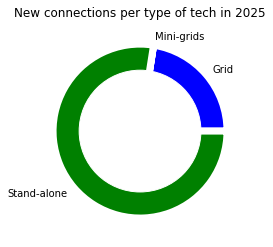

In [193]:
newconnections_2025_Grid = summary_table["NewConnections2025"][0]
newconnections_2025_MG = (summary_table["NewConnections2025"][3] +
                          summary_table["NewConnections2025"][4] +
                          summary_table["NewConnections2025"][5] +
                          summary_table["NewConnections2025"][6])

newconnections_2025_SA = (summary_table["NewConnections2025"][1] +
                          summary_table["NewConnections2025"][2])

groups='Grid', 'Mini-grids', 'Stand-alone'
size=[newconnections_2025_Grid, newconnections_2025_MG, newconnections_2025_SA]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=groups, colors=['blue','red','green'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title('New connections per type of tech in 2025')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()